In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

%matplotlib inline

In [24]:
plt.rcParams['font.family'] = 'sans-serif'
df = pd.read_csv('data/happiness_2015.csv')
df.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


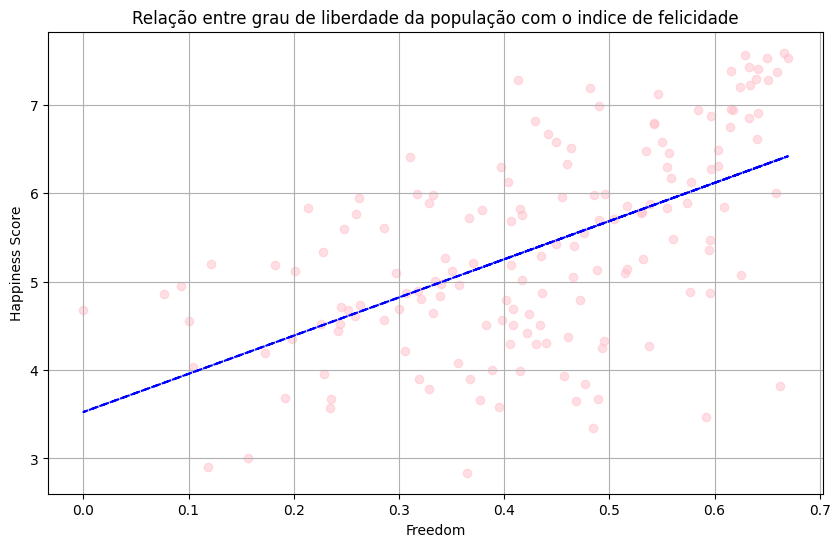

In [12]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['Freedom'], df['Happiness Score'], alpha=0.5, color='pink')

# Calculando a linha de melhor ajuste
z = np.polyfit(df['Freedom'], df['Happiness Score'], 1)
p = np.poly1d(z)

# Adicionando a linha de tendência ao gráfico
plt.plot(df['Freedom'], p(df['Freedom']), "b--")

# Adicionando títulos e rótulos
plt.title('Relação entre grau de liberdade da população com o indice de felicidade')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')

# Mostrando o gráfico
plt.grid(True)
plt.show()

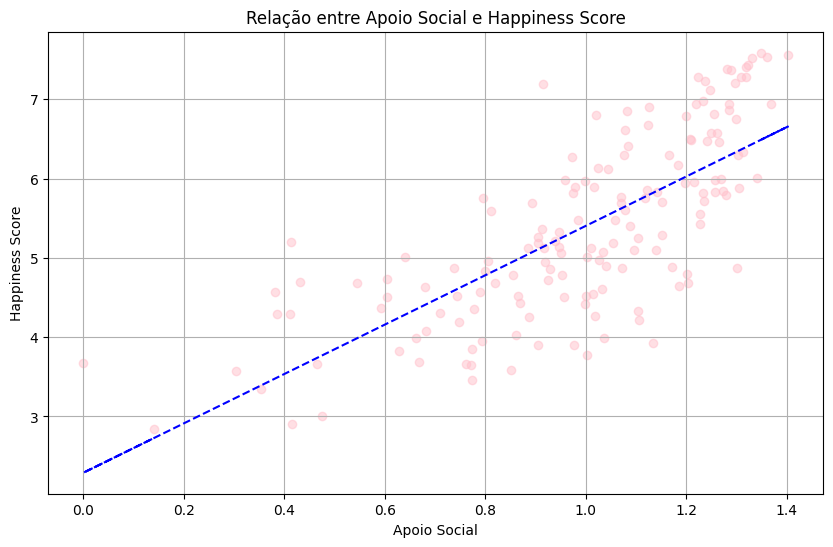

In [13]:

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['Family'], df['Happiness Score'], alpha=0.5,  color='pink')

# Calculando a linha de melhor ajuste
z = np.polyfit(df['Family'], df['Happiness Score'], 1)
p = np.poly1d(z)

# Adicionando a linha de tendência ao gráfico
plt.plot(df['Family'], p(df['Family']), "b--")

# Adicionando títulos e rótulos
plt.title('Relação entre Apoio Social e Happiness Score')
plt.xlabel('Apoio Social')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

In [14]:
media_happiness = df['Happiness Score'].mean()

df['Categoria'] = df['Happiness Score'].apply(lambda x: 'Acima da Média' if x > media_happiness else 'Abaixo da Média')

agrupado_por_categoria = df.groupby('Categoria')['Happiness Score'].agg(['count', 'mean', 'std'])

print(agrupado_por_categoria)

                 count      mean       std
Categoria                                 
Abaixo da Média     84  4.474429  0.600936
Acima da Média      74  6.398838  0.642820


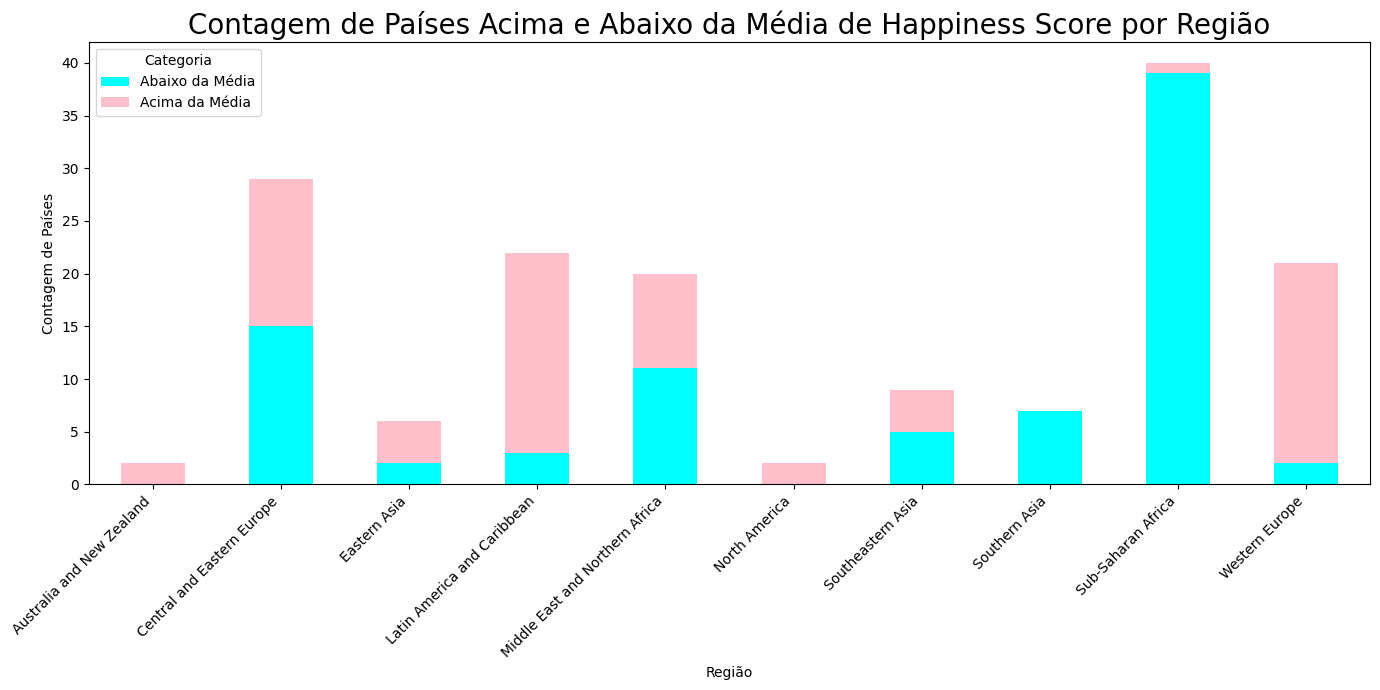

In [37]:
media_happiness = df['Happiness Score'].mean()

df['Categoria'] = df['Happiness Score'].apply(lambda x: 'Acima da Média' if x > media_happiness else 'Abaixo da Média')

agrupado = df.groupby(['Region', 'Categoria']).size().unstack(fill_value=0)

ax = agrupado.plot(kind='bar', stacked=True, figsize=(14, 7), color=['cyan', 'pink'])

plt.title('Contagem de Países Acima e Abaixo da Média de Happiness Score por Região', fontsize=20)
plt.xlabel('Região')
plt.ylabel('Contagem de Países')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Categoria')
plt.tight_layout()
plt.show()


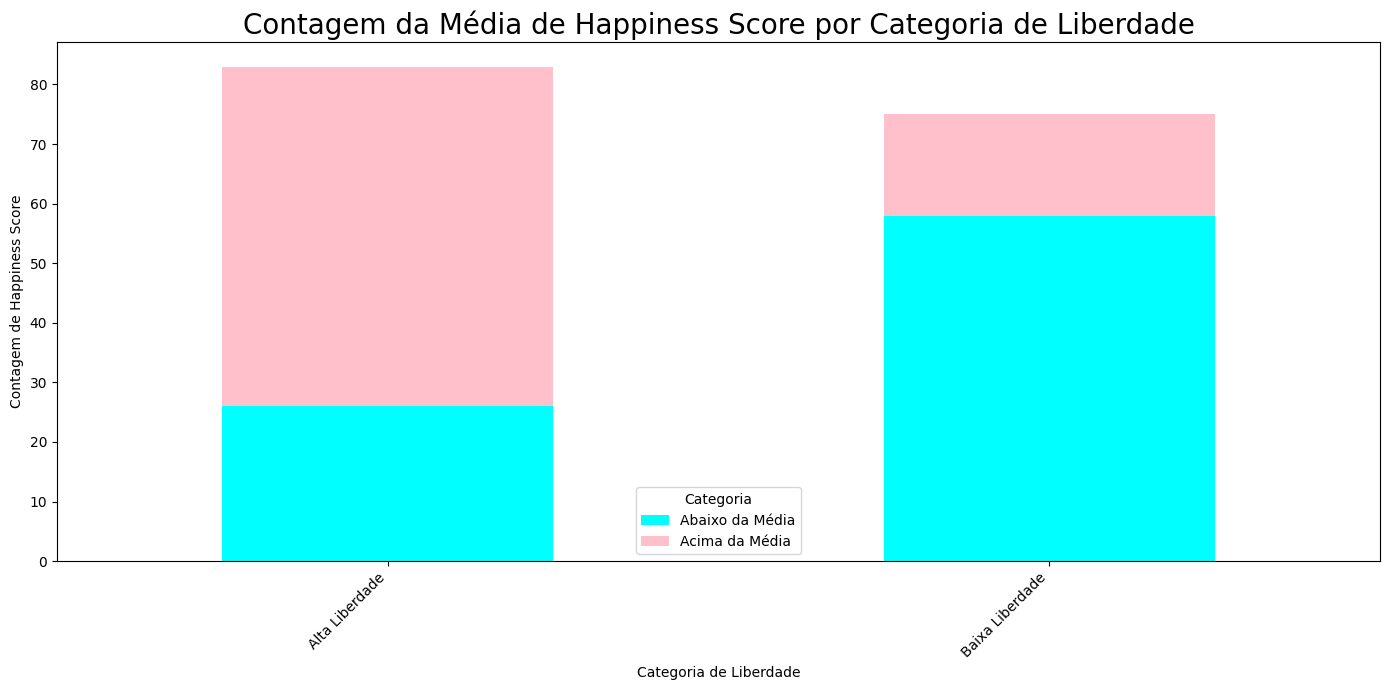

In [40]:
media_happiness = df['Happiness Score'].mean()

df['Categoria'] = df['Happiness Score'].apply(lambda x: 'Acima da Média' if x > media_happiness else 'Abaixo da Média')

media_freedom = df['Freedom'].mean()

df['CategoriaFreedom'] = df['Freedom'].apply(lambda x: 'Alta Liberdade' if x > media_freedom else 'Baixa Liberdade')
agrupado = df.groupby(['CategoriaFreedom', 'Categoria']).size().unstack(fill_value=0)

agrupado.plot(kind='bar', stacked=True, figsize=(14, 7), color=['cyan', 'pink'])

plt.title('Contagem da Média de Happiness Score por Categoria de Liberdade', fontsize=20)
plt.xlabel('Categoria de Liberdade')
plt.ylabel('Contagem de Happiness Score')
plt.xticks(rotation=45, ha='right') 

plt.legend(title='Categoria')
plt.tight_layout()  
plt.show()